## Brain Tumor SVM

Aims:
- test possibility of using an svm with multiple classification
- get a comparison point for the svm method using the brain tumor dataset

In [2]:
#import all required libraries
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle
from skimage.io import imread

In [4]:
Categories=['glioma','meningioma','notumor','pituitary']
flat_data_arr=[]
target_arr=[]
datadir='C:\\Users\\SophieJones\\OneDrive - Harnham Search and Selection Ltd\\Bench\\Projects\\ML\\Image-Classification\\BrainTumor\\archive\\Training'

for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  count = 0
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
    count+=1
  print(f'loaded category:{i} successfully')
  print(count)
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : glioma
loaded category:glioma successfully
1321
loading... category : meningioma
loaded category:meningioma successfully
1339
loading... category : notumor
loaded category:notumor successfully
1595
loading... category : pituitary
loaded category:pituitary successfully
1457


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,0.000606,0.000606,0.000606,0.000624,0.000624,0.000624,0.001706,0.001706,0.001706,0.002238,...,0.001706,0.001706,0.001706,0.000624,0.000624,0.000624,0.000606,0.000606,0.000606,3
5708,0.000171,0.000171,0.000171,0.000220,0.000220,0.000220,0.003273,0.003273,0.003273,0.004774,...,0.001563,0.001563,0.001563,0.000193,0.000193,0.000193,0.000171,0.000171,0.000171,3
5709,0.000606,0.000606,0.000606,0.000641,0.000641,0.000641,0.001736,0.001736,0.001736,0.000287,...,0.000606,0.000606,0.000606,0.000606,0.000606,0.000606,0.000606,0.000606,0.000606,3
5710,0.000606,0.000606,0.000606,0.000624,0.000624,0.000624,0.001706,0.001706,0.001706,0.002238,...,0.001741,0.001741,0.001741,0.000170,0.000170,0.000170,0.000014,0.000014,0.000014,3


In [5]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [5]:
#slow training with parameter optimisation
param_grid={'C':[1,10],'gamma':[0.0001,0.001,0.1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete


In [6]:
#faster training - set parameters
model=svm.SVC(C=10, kernel='rbf', gamma=0.001, probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model.fit(x_train,y_train)
print('The Model is trained well with the given images')

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


In [ ]:
#{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [7]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([2, 2, 1, ..., 3, 1, 0])

In [8]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([2, 2, 1, ..., 3, 1, 1])

In [9]:
#classification_report(y_pred,y_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
#confusion_matrix(y_pred,y_test)

The model is 92.38845144356955% accurate


In [20]:
confusion_matrix(y_pred,y_test)

array([[236,  10,   3,   0],
       [ 27, 229,   9,   2],
       [  1,  24, 304,   3],
       [  0,   5,   3, 287]], dtype=int64)

In [21]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.89      0.95      0.92       249\n           1       0.85      0.86      0.86       267\n           2       0.95      0.92      0.93       332\n           3       0.98      0.97      0.98       295\n\n    accuracy                           0.92      1143\n   macro avg       0.92      0.92      0.92      1143\nweighted avg       0.92      0.92      0.92      1143\n'

In [10]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


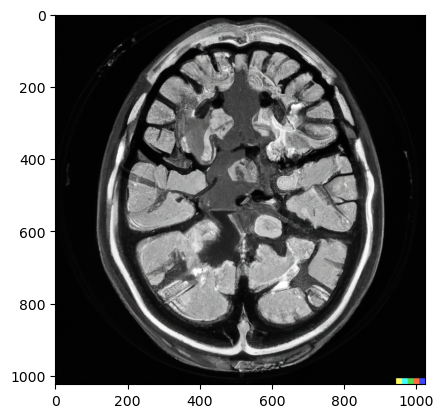

glioma = 0.26133795315819963%
meningioma = 10.393853077226424%
notumor = 89.21233851838996%
pituitary = 0.13247045122542092%
The predicted image is : notumor
Is the image a notumor ?(y/n)
Thank you for your feedback


In [11]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

img=imread('DALL·E 2023-01-12 10.36.23 - single mri photo of a human brain scan with a tumor.png')
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for your feedback")
